In [1]:
import os
from PIL import Image, __version__
from matplotlib import image, pyplot, colors
from plotnine import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print('Pillow Version:', __version__)

Pillow Version: 7.1.2


In [3]:
# sort out directory
os.chdir("/Users/mac/Documents/Projects/computer_vision/")
os.getcwd()

'/Users/mac/Documents/Projects/computer_vision'

# Question 1a
* load PNG file as numpy array

In [4]:
rocketman=Image.open('2_2D_spatial_cross_correlation/data/wallypuzzle_rocket_man.png')
print(rocketman.format, rocketman.size, rocketman.mode)

PNG (111, 123) RGBA


In [5]:
# show image - it appears as  seperate pop-up
#rocketman.show()

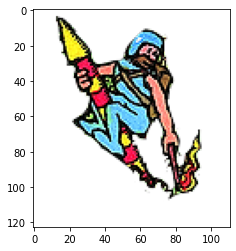

In [6]:
# display the the image of rocket man using matplotlib
pyplot.imshow(rocketman)
pyplot.show()

In [7]:
# convert to numpy array
rocketman_array=np.asarray(rocketman)

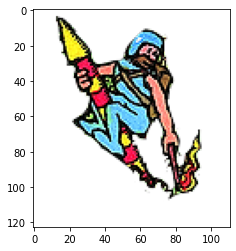

In [8]:
# convert to numpy array back to rocketman
rocketman_array_back_to_image=Image.fromarray(rocketman_array)
pyplot.imshow(rocketman_array_back_to_image) 
pyplot.show()

# Question 1b
* Write a function which turns a 3 x 2D (RGB) image into greyscale.

I also just mess around with images here.

In [9]:
# change rocketman into black & white
rocketman_bw=rocketman.convert('LA')

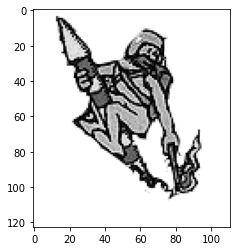

In [10]:
pyplot.imshow(rocketman_bw) # display the array of pixels as an image
pyplot.show()

In [11]:
# is there a difference in the colour range of black and white and RGB?
np.asarray(rocketman_bw).min()


0

In [12]:
np.asarray(rocketman_bw).max()

255

In [13]:
# this is the shape of the above - 
# this means the y-axis ranges from 0-123, and the x-axis ranges from 0-111. This is reflected in the axis values
print(f'{rocketman_array.shape} a hundred and twenty three 111 x 4 arrays')

(123, 111, 4) a hundred and twenty three 111 x 4 arrays


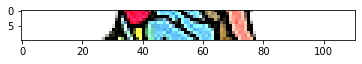

In [14]:
# let's show a slice of rocket man
rocketman_array_row_slice=rocketman_array[50:60,:,0:4]     # take slice from tensor/matrix/array thing
rocketman_row_slice=Image.fromarray(rocketman_array_row_slice) # convert numpy array to image
pyplot.imshow(rocketman_row_slice) 
pyplot.show()

In [15]:
pyplot.imsave('rocketman_slice.pdf', rocketman_array_row_slice)

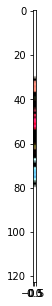

In [16]:
# column slice 1 pxl wide
rocketman_array_col_slice=rocketman_array[:,40:41,0:4]
rocketman_col_slice=Image.fromarray(rocketman_array_col_slice) # convert numpy array to image
pyplot.figure(figsize = (10,5))
pyplot.imshow(rocketman_col_slice) 
pyplot.show()

In [17]:
# let's make rocketman transparent - this means multiplying the 'A' in RGBA by 0.1 to make the image transparent.
# Here's an brute force way:
rocketman_array_trans=np.empty_like(rocketman_array)                    # create a tensor the same size as original
for i in range(rocketman_array.shape[0]):
    for j in range(rocketman_array.shape[1]):
        rocketman_array_trans[i,j,:]=rocketman_array[i,j,:]*np.array([1,1,1,0.1]) # scale last element (alpha) in RGBA array

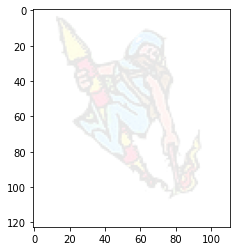

In [18]:
rocketman_trans=Image.fromarray(rocketman_array_trans) # convert tensor to image
pyplot.imshow(rocketman_trans) 
pyplot.show()

In [19]:
# let's try making rocket man transparent using matrix multiplication.
# I have 123 111x4 matricies to multiply by a 4x1 scaling matrix:

rocketman_array_trans2=rocketman_array*np.array([1,1,1,0.5])

In [20]:
# notice the multiplication has changed the dtype in the array
rocketman_array.dtype

dtype('uint8')

In [21]:
rocketman_array_trans2.dtype

dtype('float64')

In [22]:
# I need to change to uint8 datatype
rocketman_array_trans2=rocketman_array_trans2.astype(np.uint8)

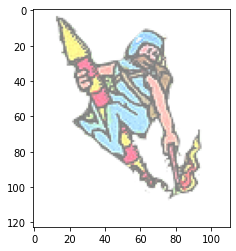

In [23]:
# now I can plot the transparent image
rocketman_trans2=Image.fromarray(rocketman_array_trans2) # convert tensor to image
pyplot.imshow(rocketman_trans2) 
pyplot.show()


In [24]:
# permissions on the array becasue I'm going to make some changes.
rocketman_array.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

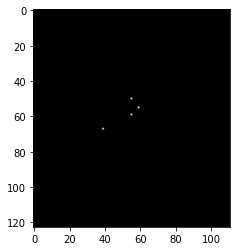

In [25]:
# Let's see if I can get one type of pixel, e.g. this blue colour (RGBA=[156, 255, 255, 255])
mask=rocketman_array.copy() # I create a copy because I need to modify the image, and to do that I need write permission 
                            # (note this is may not be a copy of the image, but instead a copy of the pointers - which isn't important here, but good to know)
indices_lst_notblue = np.where(np.any(mask != [156, 255, 255, 255], axis=-1)) # get any pixel that is NOT blue pixels
indices_lst_blue = np.where(np.all(mask == [156, 255, 255, 255], axis=-1))    # this is just an example showing how to get blue pixels
mask[indices_lst_notblue]=[0,0,0,255] # colour all not blue pixels, black
pyplot.imshow(mask)                   # show results
pyplot.show()

In [26]:
pyplot.imsave('blue_pixels_in_maze.pdf', mask)

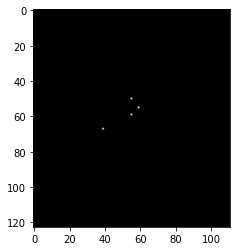

In [27]:
# now the rocketman has transparent pixels around him, so let's find them and colour them black
mask2=rocketman_array.copy() # I create a copy because I need to modify the image, and to do that I need write permission
indices_lst_trans = np.all(mask[3] == 255,) # get any pixel that is NOT blue pixels
mask[indices_lst_notblue]=[0,0,0,255] # colour all not blue pixels, black
pyplot.imshow(mask)                   # show results
pyplot.show()


In [28]:
mask2=rocketman_array.copy()
indices_lst_solid=rocketman_array[:,:,3]==255 # all pixels with no transparency


In [29]:
# how many pixels are solid
indices_lst_solid.sum()

3401

In [30]:
# how many pixels have some transparency
(~indices_lst_solid).sum()

10252

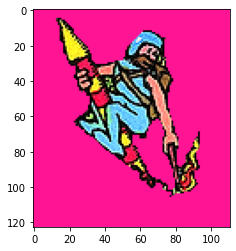

In [31]:
mask2[~(indices_lst_solid)]=[255,20,147,255] # colour all non-transparent pixels, fluro pink
pyplot.imshow(mask2)                         # show results
pyplot.show()

# useful reference: https://stackoverflow.com/questions/52735231/how-to-select-all-non-black-pixels-in-a-numpy-array/52737768

In [32]:
pyplot.imsave('rocketman_hotpink.pdf', mask2)

# Colour distribution

## Puzzle image

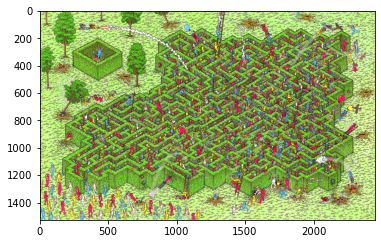

In [33]:
puzzle=Image.open('2_2D_spatial_cross_correlation/data/wallypuzzle.png')
pyplot.imshow(puzzle)
pyplot.show()

In [34]:
puzzle_array=np.asarray(puzzle)

In [35]:
puzzle_array.shape

(1526, 2446, 4)

In [36]:
# create dataframe so I can plot the colour frequency
R=puzzle_array[:,:,0][0].astype('int')
G=puzzle_array[:,:,1][0].astype('int')
B=puzzle_array[:,:,2][0].astype('int')
Count=1
colours_df=pd.DataFrame({'R':R,'G':G,'B':B,'Count':Count})

In [37]:
# aggregate
colours_agg=colours_df.groupby(['R','G','B'])['Count'].sum().reset_index()

In [38]:
# convert rgb to hex (function)
def rgbToHex(df):
    r,g,b=(df.R,df.G,df.B)
    return '#%02x%02x%02x' % (r,g,b)

In [39]:
# apply colour conversion function
colours_agg['hex']=colours_agg.apply(rgbToHex, axis =1)

In [40]:
# inspect handiwork
colours_agg.head(3)

,R,G,B,Count,hex
0,0,0,0,141,#000000
1,0,0,1,1,#000001
2,0,0,3,1,#000003


In [41]:
colours_agg.sort_values(['Count'],ascending=False)

,R,G,B,Count,hex
0,0,0,0,141,#000000
1664,255,255,255,13,#ffffff
960,199,255,142,7,#c7ff8e
1090,203,255,146,7,#cbff92
1058,202,255,146,6,#caff92
...,...,...,...,...,...
527,183,255,94,1,#b7ff5e
526,183,249,131,1,#b7f983
525,183,205,117,1,#b7cd75
524,182,255,117,1,#b6ff75


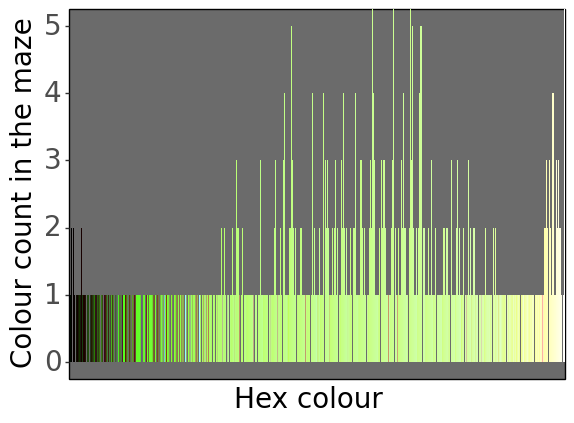

<ggplot: (7029804464)>

In [71]:
hist=(ggplot(colours_agg)
      + geom_bar(aes(x='hex',y='Count',fill='hex'),
                stat='identity')
      + labs(x='Hex colour', y='Colour count in the maze')
      + scale_fill_manual(values=colours_agg.hex)
      + coord_cartesian(ylim=(0,5))
      + theme(legend_position='none',
             axis_text_y=element_text(size=20),
             axis_title_y=element_text(size=20),
             axis_title_x=element_text(size=20),
             axis_text_x=element_blank(),
             axis_ticks_major_x=element_blank(),
             panel_grid=element_blank(),
             panel_background=element_rect(fill='#6b6b6b'),
             panel_border=element_rect(fill='#000000'))
)
hist

In [72]:
save_as_pdf_pages([hist])

/Users/mac/anaconda/lib/python3.6/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: plotnine-save-7029804464.pdf


## Rocketman

In [44]:
rocketman=Image.open('2_2D_spatial_cross_correlation/data/wallypuzzle_rocket_man.png')
rocketman_array=np.asarray(rocketman)

In [45]:
# create dataframe so I can plot the colour frequency
Rrm=rocketman_array[:,:,0][0].astype('int')
Grm=rocketman_array[:,:,1][0].astype('int')
Brm=rocketman_array[:,:,2][0].astype('int')
Count=1
colours_df_rm=pd.DataFrame({'R':Rrm,'G':Grm,'B':Brm,'Count':Count})

In [46]:
# aggregate
colours_agg_rm=colours_df_rm.groupby(['R','G','B'])['Count'].sum().reset_index()

In [47]:
colours_agg_rm

,R,G,B,Count
0,0,0,0,111


In [48]:
# apply colour conversion function
colours_agg_rm['hex']=colours_agg_rm.apply(rgbToHex, axis =1)

In [49]:
colours_agg_rm

,R,G,B,Count,hex
0,0,0,0,111,#000000


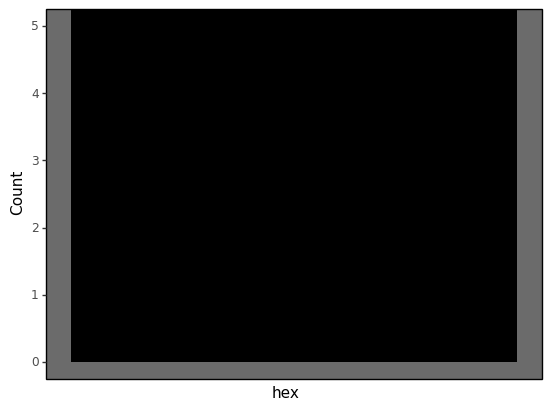

<ggplot: (7020958237)>

In [50]:
plot=(ggplot(colours_agg_rm)
      + geom_bar(aes(x='hex',y='Count',fill='hex'),
                stat='identity')
      + scale_fill_manual(values=colours_agg.hex)
      + coord_cartesian(ylim=(0,5))
      + theme(legend_position='none',
             axis_text_x=element_blank(),
             axis_ticks_major_x=element_blank(),
             panel_grid=element_blank(),
             panel_background=element_rect(fill='#6b6b6b'),
             panel_border=element_rect(fill='#000000'))
)
plot

In [51]:
from itertools import permutations
n = 3
candidates = [i for i in permutations([-1,0,1],2)]


In [52]:
candidates[0][0]

-1

# used for plots in report

In [53]:
run_times=np.array([0.3946218490600586, 0.34609174728393555, 0.3574197292327881, 0.35025978088378906, 3.4112911224365234, 
           0.36454010009765625, 0.37262487411499023, 3.4428811073303223, 0.34717798233032227, 0.34851598739624023, 
           3.1629979610443115, 3.180100202560425, 0.34482717514038086, 0.3779029846191406, 0.4096231460571289, 
           0.35776305198669434, 3.315747022628784, 0.3487100601196289, 0.37030768394470215, 0.3604710102081299, 
           0.35688114166259766, 0.35179972648620605, 0.35724711418151855, 0.3455781936645508, 0.36676788330078125, 
           0.34377288818359375, 0.3557569980621338, 0.361433744430542, 3.2566418647766113, 0.3508768081665039, 
           0.3537440299987793, 0.36481189727783203, 0.3518640995025635, 0.48990702629089355, 0.3996567726135254, 
           0.36377501487731934, 0.3532118797302246, 0.3461291790008545, 3.091226816177368, 0.3460206985473633,
           0.34641098976135254])

In [54]:
run_times.shape

(41,)

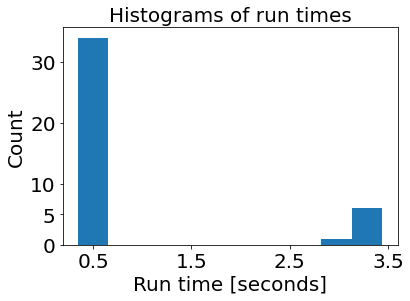

In [55]:
plt.hist(run_times)
plt.xticks([0.5,1.5,2.5,3.5],fontsize=20)
plt.yticks([0,5,10,20,30],fontsize=20)

plt.xlabel('Run time [seconds]',fontsize=20)
plt.ylabel('Count',fontsize=20)

plt.title('Histograms of run times',fontsize=20)
plt.savefig("run_time_2D_script.pdf", bbox_inches='tight', dpi=100)

In [56]:
bottom_row=528
top_row=651
col_left=981
col_right=1092 
answer=puzzle_array[528:651,981:1092,:]

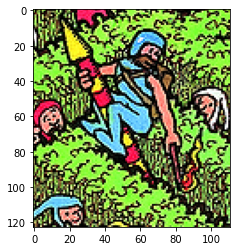

In [57]:
to_plot=Image.fromarray(answer) # convert numpy array to image
pyplot.imshow(to_plot) 
pyplot.savefig("2D_answer.pdf", bbox_inches='tight', dpi=100)
pyplot.show() 

In [58]:
pyplot.show()

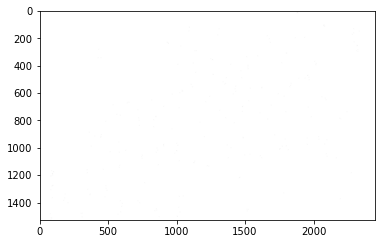

In [59]:
# Let's see if I can get one type of pixel, e.g. this blue colour (RGBA=[156, 255, 255, 255])
mask2=puzzle_array.copy() # I create a copy because I need to modify the image, and to do that I need write permission 
                            # (note this is may not be a copy of the image, but instead a copy of the pointers - which isn't important here, but good to know)
indices_lst_notblue = np.where(np.any(mask2 != [156, 255, 255, 255], axis=-1)) # get any pixel that is NOT blue pixels
indices_lst_blue = np.where(np.all(mask2 == [156, 255, 255, 255], axis=-1))    # this is just an example showing how to get blue pixels
mask2[indices_lst_notblue]=[255,255,255,255] # colour all not blue pixels, white
mask2[indices_lst_blue]=[0,0,0,255] # colour all not blue pixels, white
pyplot.imshow(mask2)                   # show results
pyplot.show()